# Income Gap Analysis

In order to understand our economy, we need ask the question of how income operates and influences the workplace, society, etc. This data from [American Community Survey](https://www.census.gov/programs-surveys/acs/) looked at graudates between 2010 and 2012. The data sampled graduates from a variety of backgrounds, and gathered information on job type, income, etc. The goal of this project is to analyze the data for differences in income, and what causes it might present us.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
%matplotlib inline
data = pd.read_csv('recent-grads.csv')
recent_grads = pd.DataFrame(data)

In [2]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [3]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [4]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [5]:
recent_grads = recent_grads.dropna(axis=0)
recent_grads.shape

(172, 21)

# Exploring the Data

Now that the data is loaded and the null values are gone, let's visualize the standard metrics and look for any other numerical relationships that will help us.

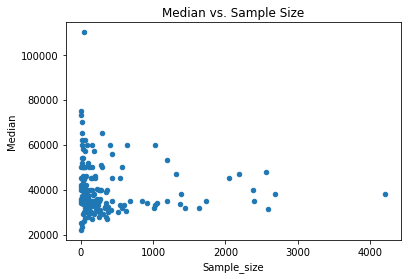

In [21]:
recent_grads.plot(kind='scatter', x='Sample_size',y='Median', title='Median vs. Sample Size')

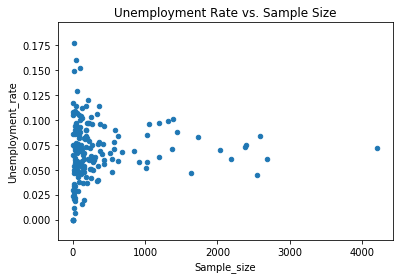

In [7]:
recent_grads.plot(kind='scatter', x='Sample_size',y='Unemployment_rate',title='Unemployment Rate vs. Sample Size')

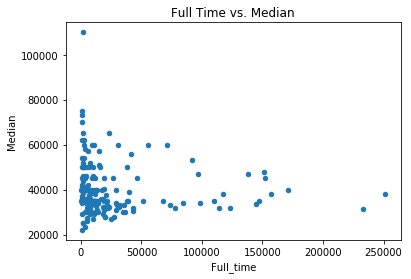

In [8]:
recent_grads.plot(kind='scatter', x='Full_time',y='Median',title='Full Time vs. Median')

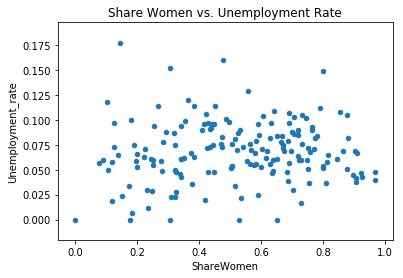

In [9]:
recent_grads.plot(kind='scatter',x='ShareWomen',y='Unemployment_rate',title='Share Women vs. Unemployment Rate')

In [10]:
recent_grads.corr()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
Rank,1.000000,0.097195,0.071137,-0.094780,0.174913,0.643781,0.004590,0.066941,0.030748,0.190272,0.016402,0.086736,0.076671,-0.872303,-0.737419,-0.800817,0.048950,0.141661,0.200360
Major_code,0.097195,1.000000,0.196784,0.179299,0.181459,0.259211,0.203375,0.197345,0.195857,0.191798,0.202203,0.220472,0.137163,-0.167237,-0.165593,-0.083655,0.036486,0.229562,0.222541
Total,0.071137,0.196784,1.000000,0.878088,0.944764,0.142999,0.945575,0.996214,0.989339,0.950268,0.981112,0.974768,0.083192,-0.106738,-0.071926,-0.083198,0.800465,0.941247,0.935510
Men,-0.094780,0.179299,0.878088,1.000000,0.672759,-0.112014,0.875176,0.870605,0.893563,0.751592,0.892454,0.869411,0.101502,0.025991,0.038725,0.052393,0.563168,0.851500,0.791336
Women,0.174913,0.181459,0.944764,0.672759,1.000000,0.297832,0.862606,0.944037,0.917681,0.954513,0.905720,0.911694,0.059108,-0.182842,-0.137738,-0.164528,0.851946,0.872132,0.904470
ShareWomen,0.643781,0.259211,0.142999,-0.112014,0.297832,1.000000,0.097496,0.147547,0.120200,0.212290,0.112523,0.121243,0.073205,-0.618690,-0.500199,-0.586932,0.195550,0.137007,0.187850
Sample_size,0.004590,0.203375,0.945575,0.875176,0.862606,0.097496,1.000000,0.964406,0.978362,0.824544,0.985212,0.917934,0.062955,-0.064475,-0.024429,-0.052256,0.701231,0.915335,0.860116
Employed,0.066941,0.197345,0.996214,0.870605,0.944037,0.147547,0.964406,1.000000,0.995831,0.934418,0.991031,0.968855,0.071374,-0.104399,-0.066706,-0.083996,0.797193,0.941236,0.927122
Full_time,0.030748,0.195857,0.989339,0.893563,0.917681,0.120200,0.978362,0.995831,1.000000,0.900711,0.998200,0.960042,0.066616,-0.079031,-0.042131,-0.061429,0.772135,0.933021,0.904714
Part_time,0.190272,0.191798,0.950268,0.751592,0.954513,0.212290,0.824544,0.934418,0.900711,1.000000,0.880656,0.945009,0.112247,-0.187516,-0.152827,-0.155224,0.804673,0.909495,0.951525


Above, we can start getting an idea of what the data holds. The majority of data points are from smaller sample sizes, but they are earining income, and unemployment seems to be uncorrelated with percentage of women per field. Let's start narrowing our search by looking at the median, column. Note that median refers to the median income of full time year round salary positions. We'll also be looking at the ShareWomen column, as this directly relates to the question we are asking.

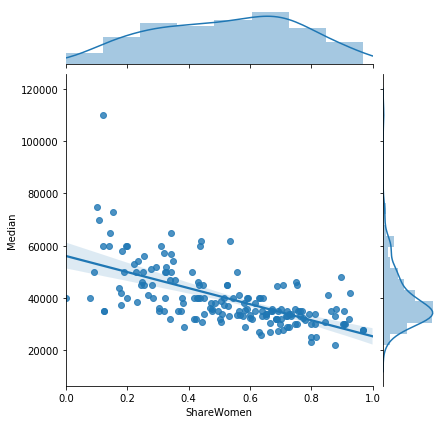

In [11]:
sns.jointplot(x='ShareWomen',y='Median',data=recent_grads, kind='reg',xlim=(0,1.0))

Although we only have 172 participants in the survey, this regression deserves more looking into as we can see the median falling with higher percentage of women. Lets dig deeper to find out why.

In [12]:
recent_grads.sort_values('Median',ascending=False)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,...,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,...,553,827,33,0.021167,62000,31500,109000,972,500,220
10,11,2407,COMPUTER ENGINEERING,41542.0,33258.0,8284.0,Engineering,0.199413,399,32506,...,5146,23621,2275,0.065409,60000,45000,75000,23694,5721,980
13,14,5008,MATERIALS SCIENCE,4279.0,2949.0,1330.0,Engineering,0.310820,22,3307,...,878,1967,78,0.023043,60000,39000,65000,2626,391,81


The top major by far is Engineering, where the lowest seems to be Psychology & Social Work. Let's explore these two a little more. First, we're going to look at the top and bottom major categories, from there we'll look to see if there's anything that can help guide us.

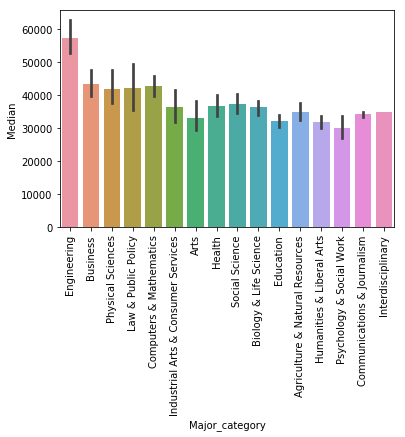

In [13]:
i = sns.barplot(x='Major_category',y='Median',data=recent_grads)
i.set_xticklabels(i.get_xticklabels(),rotation=90)
plt.show()

# Top and Bottom Majors

In [14]:
majs = ['Engineering','Business','Physical Sciences','Psychology & Social Work','Communications & Journalism', 'Humanities & Liberal Arts']
grads = recent_grads[recent_grads.Major_category.isin(majs)]

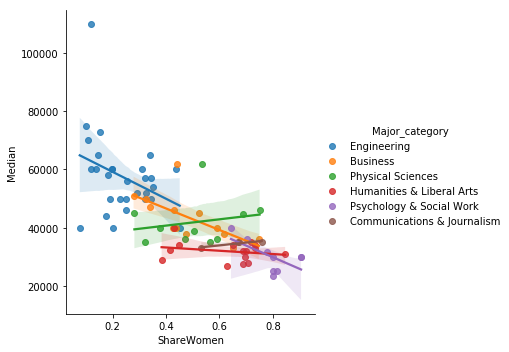

In [15]:
ax=sns.lmplot(x='ShareWomen', y='Median',hue='Major_category', data=grads, truncate=True)
ax.set_xticklabels()

Now that the top and bottom earning major categories have been sorted and visaulized, we can see the median income linked with major category naturally. Let's look into this to see what else can be found.

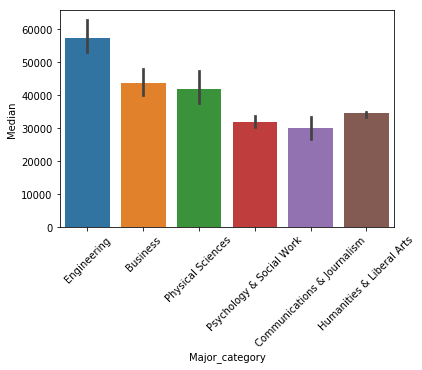

In [16]:
%matplotlib inline
x = sns.barplot(x="Major_category", y="Median",data=grads)
x.set_xticklabels(majs,rotation=45)

plt.show()

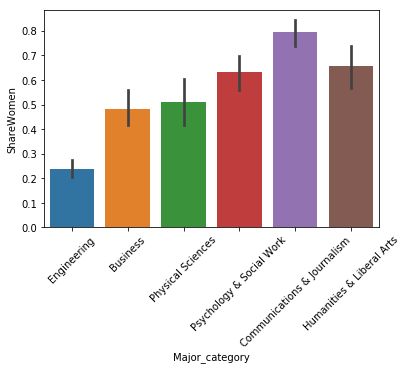

-0.7312867547093194


In [17]:
y = sns.barplot(x="Major_category", y="ShareWomen",data=grads)
y.set_xticklabels(majs,rotation=45)
plt.show()

corr = grads['Median'].corr(recent_grads['ShareWomen'])
print(corr)

So there is a negative correlation between Median and ShareWomen. Based on the data available, the cause was able to be determined that women are less represented in major categories with high Median pay. While this dataset only captures a brief moment in time, we should look to see how this problem has evolved over time. [The Department of Education Statistics](https://nces.ed.gov/programs/digest/2013menu_tables.asp) collects data on degrees earned by women, and has done so since 1970. This set contains the dates up to 2012, as it should be consistant with that of the other data. Let's look into the data and see what can be found.

In [18]:
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
women_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


While the specific subfield for each category is not included (ex. Chemical Enginnering vs. Nuclear Engineering) we can use them for the 'Major_category' data in our other dataset. Becuase this new data set has year column, we can plot the number of women as a function of time for our categoires of interest. However, in the previous data set the major category of Humanities & Liberal Arts doesn't really fit well here, as for each major there is only 1 count for each major, to decide lets choose be sample size, and find the best corresponding major.

In [19]:
hum = recent_grads[recent_grads['Major_category']=='Humanities & Liberal Arts']
hum.sort_values('Sample_size',ascending=False).head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
137,138,3301,ENGLISH LANGUAGE AND LITERATURE,194673.0,58227.0,136446.0,Humanities & Liberal Arts,0.700898,1436,149180,...,57825,81180,14345,0.087724,32000,23000,41000,57690,71827,26503
114,115,6402,HISTORY,141951.0,78253.0,63698.0,Humanities & Liberal Arts,0.448732,1058,105646,...,40657,59218,11176,0.095667,34000,25000,47000,35336,54569,16839
140,141,3401,LIBERAL ARTS,71369.0,22339.0,49030.0,Humanities & Liberal Arts,0.686993,569,54844,...,19187,33438,4657,0.078268,32000,25000,42000,18565,28558,9030
135,136,4801,PHILOSOPHY AND RELIGIOUS STUDIES,54814.0,31967.0,22847.0,Humanities & Liberal Arts,0.416810,375,40157,...,16659,21816,4267,0.096052,32200,23000,47100,14444,20313,8051
115,116,2602,FRENCH GERMAN LATIN AND OTHER COMMON FOREIGN L...,48246.0,12835.0,35411.0,Humanities & Liberal Arts,0.733968,342,38315,...,14569,20056,3132,0.075566,34000,25000,45000,15051,18193,5267


By sorting by sample size we can see that English Language and Literature is the best choice.

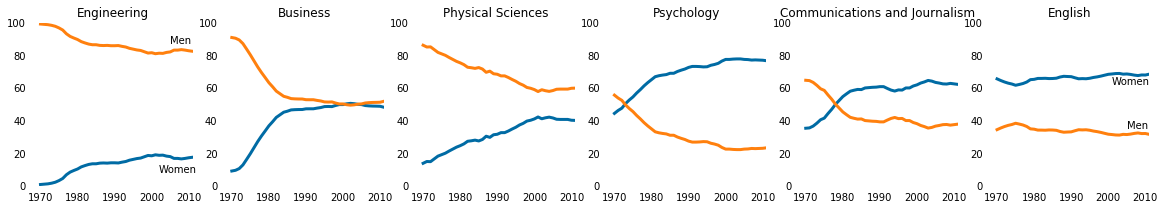

In [20]:
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Business','Physical Sciences','Psychology','Communications and Journalism','English']

fig = plt.figure(figsize=(20, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 35, 'Men')
        ax.text(2001, 62, 'Women')
plt.show()

Although the Business category has converged around 50%, from the visuals above it seems clear that gaps exist at the top and bottom earning majors. The top earner, Engineering, shows women more represented over the last few decades, but growing at a very slow pace. Physical Sciences seems to have hit a cieling/floor at the 60 and 40 marks around the year 2000. However what's interesting is that both Psychology and Communications have actually iverted their gender representation, while English has not seen much variation. The goal of this project was to investigate income gap. It was discovered that the income gap between genders exists, in various fields, and this is due to women being under represented in high earning majors like Engineering and Physical Sciences. Upon discovering this we found that these majors have had a greater representation of women over the decades, although there is not an equal split as in Business, there is progress to be seen.